# 📊 Data Exploration: Vitals, Labs, Demographics, and Cohort

In this notebook, we explore and summarize four key files from the ARMD dataset:

- `vitals` – Patient vital signs such as temperature, heart rate, blood pressure, etc.  
- `labs` – Laboratory results including WBC, creatinine, procalcitonin, and other infection markers.  
- `demographics` – Patient baseline information like age, gender, and socioeconomic indicators.  
- `cohort` – Culture orders and microbiology results including antibiotic susceptibility and organism type.

All four files will be **joined using the `order_proc_id_coded` column**, which uniquely identifies each culture order. This allows us to align vitals, labs, and demographic features to the corresponding microbiology result for supervised learning.

In [63]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
data_path = "../src/data/"

## 🩺 Vitals Data Exploration

This section explores the `vitals` file, which includes measurements such as heart rate, respiratory rate, temperature, systolic and diastolic blood pressure recorded before the culture was ordered. We will analyze missingness, distributions, and trends in these features.

### 📄 File: `microbiology_cultures_vitals.csv`

Based on the ARMD dataset description and supporting clinical paper, we will focus on the `median_` columns in this file as they provide a more stable and representative summary of the patient's condition prior to culture ordering.


In [65]:
# file path for vitals data and reading the CSV file
vitals_file = data_path + "microbiology_cultures_vitals.csv"
vitals_data = pd.read_csv(vitals_file)

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\130315295.py:3: DtypeWarning: Columns (9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  vitals_data = pd.read_csv(vitals_file)


In [66]:
vitals_data.head()

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,Q25_heartrate,Q75_heartrate,median_heartrate,Q25_resprate,Q75_resprate,median_resprate,Q25_temp,...,first_diasbp,last_diasbp,last_sysbp,first_sysbp,last_temp,first_temp,last_resprate,first_resprate,last_heartrate,first_heartrate
0,JC2361817,131308278530,718222807,86.0,86.0,86.0,Null,Null,Null,Null,...,Null,80.0,109.0,Null,Null,Null,Null,Null,Null,86.0
1,JC2219930,131318072067,748261410,Null,Null,Null,Null,Null,Null,Null,...,75.0,75.0,121.0,121.0,Null,Null,Null,Null,Null,Null
2,JC2455425,131256420868,574712812,70.0,70.0,70.0,Null,Null,Null,Null,...,69.0,Null,Null,106.0,Null,Null,Null,Null,70.0,Null
3,JC1826078,131213257732,514463599,Null,Null,Null,Null,Null,Null,Null,...,90.0,90.0,120.0,120.0,Null,Null,Null,Null,Null,Null
4,JC1541734,131021676805,410407692,39.0,78.0,73.0,Null,Null,Null,Null,...,Null,42.0,62.0,Null,Null,Null,Null,Null,Null,80.0


In [67]:
vitals_data.shape

(4591374, 28)

In [68]:
vitals_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 28 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   anon_id               object
 1   pat_enc_csn_id_coded  int64 
 2   order_proc_id_coded   int64 
 3   Q25_heartrate         object
 4   Q75_heartrate         object
 5   median_heartrate      object
 6   Q25_resprate          object
 7   Q75_resprate          object
 8   median_resprate       object
 9   Q25_temp              object
 10  Q75_temp              object
 11  median_temp           object
 12  Q25_sysbp             object
 13  Q75_sysbp             object
 14  median_sysbp          object
 15  Q25_diasbp            object
 16  Q75_diasbp            object
 17  median_diasbp         object
 18  first_diasbp          object
 19  last_diasbp           object
 20  last_sysbp            object
 21  first_sysbp           object
 22  last_temp             object
 23  first_temp            object
 24

In [69]:
# features that start with 'median_' are the ones we will focus on
median_columns = [col for col in vitals_data.columns if col.startswith('median_')]
# add order_proc_id_coded to the list of median columns
median_columns.append('order_proc_id_coded')
# filter the DataFrame to only include median columns
vitals_median_data = vitals_data[median_columns]
print(median_columns)
print(vitals_median_data.shape)

['median_heartrate', 'median_resprate', 'median_temp', 'median_sysbp', 'median_diasbp', 'order_proc_id_coded']
(4591374, 6)


In [70]:
# replace 'Null' with NaN for better handling of missing values
vitals_median_data = vitals_median_data.replace('Null', np.nan)

# check for missing values in the median columns
vitals_median_data.isnull().sum()

median_heartrate        19691
median_resprate        132159
median_temp             84386
median_sysbp            95495
median_diasbp           97166
order_proc_id_coded         0
dtype: int64

In [71]:
vitals_median_data.tail()

,median_heartrate,median_resprate,median_temp,median_sysbp,median_diasbp,order_proc_id_coded
4591369,103.0,20.0,95.36,135.0,80.0,791282965
4591370,94.0,18.0,99.86,142.0,88.0,790861816
4591371,94.0,18.0,99.86,142.0,88.0,790861818
4591372,60.0,20.0,99.68,131.0,60.0,779043709
4591373,69.0,20.0,99.68,NaN,NaN,804866307


In [72]:
vitals_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 6 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   median_heartrate     object
 1   median_resprate      object
 2   median_temp          object
 3   median_sysbp         object
 4   median_diasbp        object
 5   order_proc_id_coded  int64 
dtypes: int64(1), object(5)
memory usage: 210.2+ MB


In [73]:
# transform the data to numeric for analysis
vitals_median_data = vitals_median_data.apply(pd.to_numeric, errors='coerce')

# check the data types after conversion
vitals_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591374 entries, 0 to 4591373
Data columns (total 6 columns):
 #   Column               Dtype  
---  ------               -----  
 0   median_heartrate     float64
 1   median_resprate      float64
 2   median_temp          float64
 3   median_sysbp         float64
 4   median_diasbp        float64
 5   order_proc_id_coded  int64  
dtypes: float64(5), int64(1)
memory usage: 210.2 MB


In [74]:
# check duplicates in the order_proc_id_coded column
duplicates = vitals_median_data['order_proc_id_coded'].duplicated().sum()
print(f"Number of duplicate order_proc_id_coded entries: {duplicates}")

Number of duplicate order_proc_id_coded entries: 4010034


In [75]:
# check rows of order_proc_id_coded = 790861816
order_cols = vitals_median_data[vitals_median_data['order_proc_id_coded'] == 790861816]
order_cols.shape

(60, 6)

In [81]:
order_cols.value_counts()

median_heartrate  median_resprate  median_temp  median_sysbp  median_diasbp  order_proc_id_coded
94.0              18.0             99.86        142.0         88.0           790861816              60
Name: count, dtype: int64

In [77]:
# after we found that values for each order_proc_id_coded rows are repeated, we can drop the duplicates
vitals_median_data = vitals_median_data.drop_duplicates(subset='order_proc_id_coded')
vitals_median_data.shape

(581340, 6)

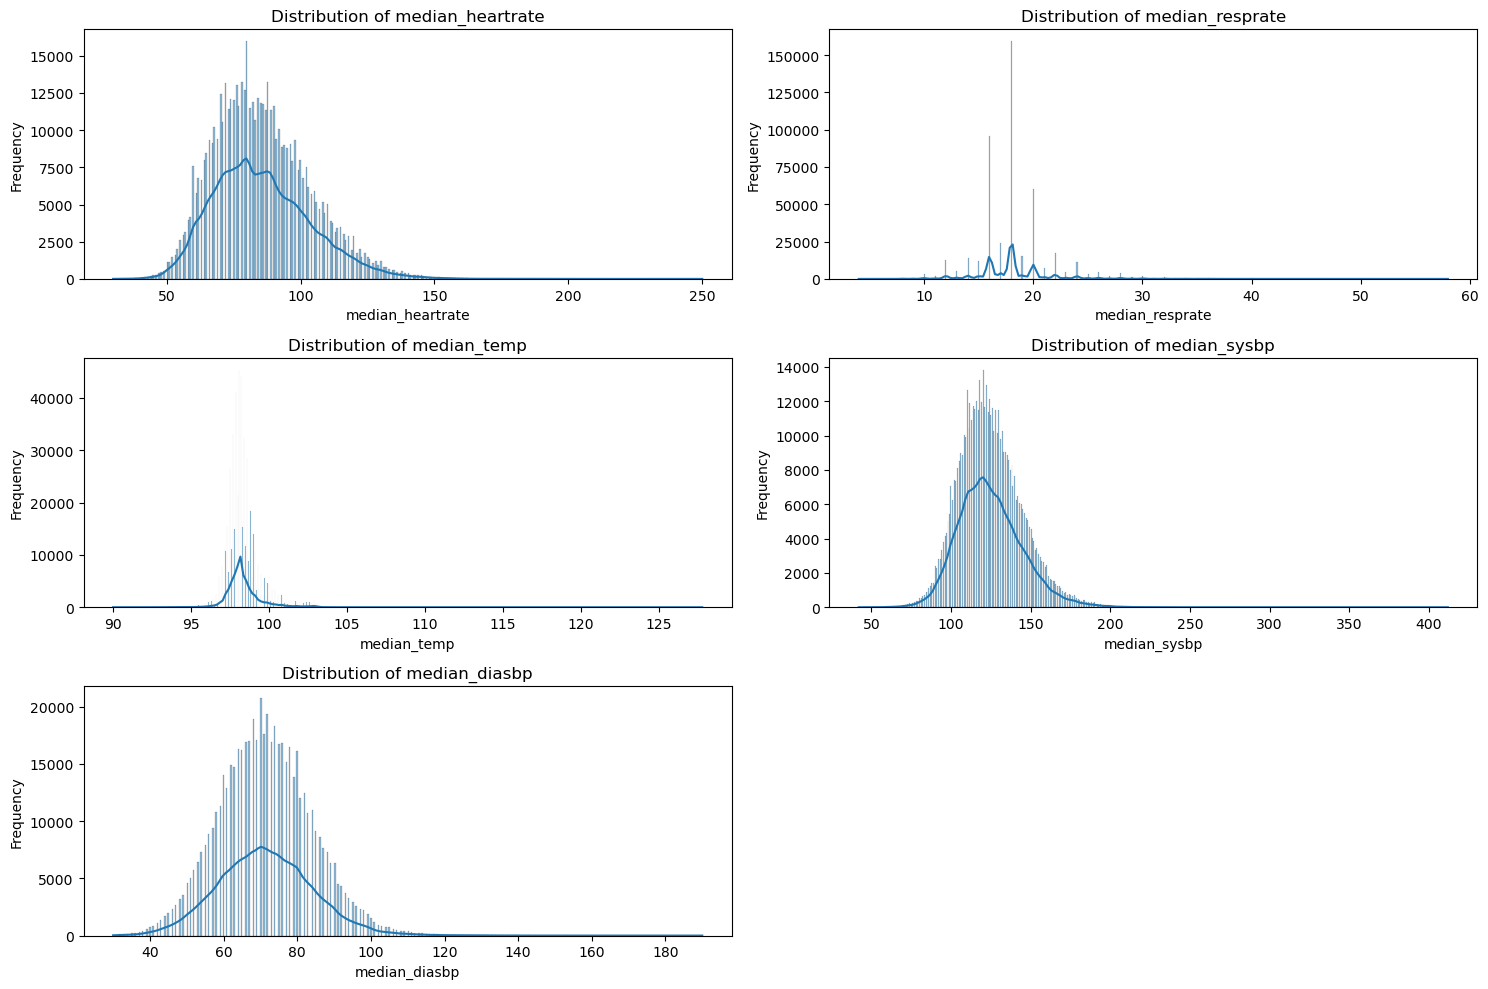

In [78]:
# plot distributions of the median features
plt.figure(figsize=(15, 10))
for i, column in enumerate(median_columns[:-1], 1):
    plt.subplot(3, 2, i)
    sns.histplot(vitals_median_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

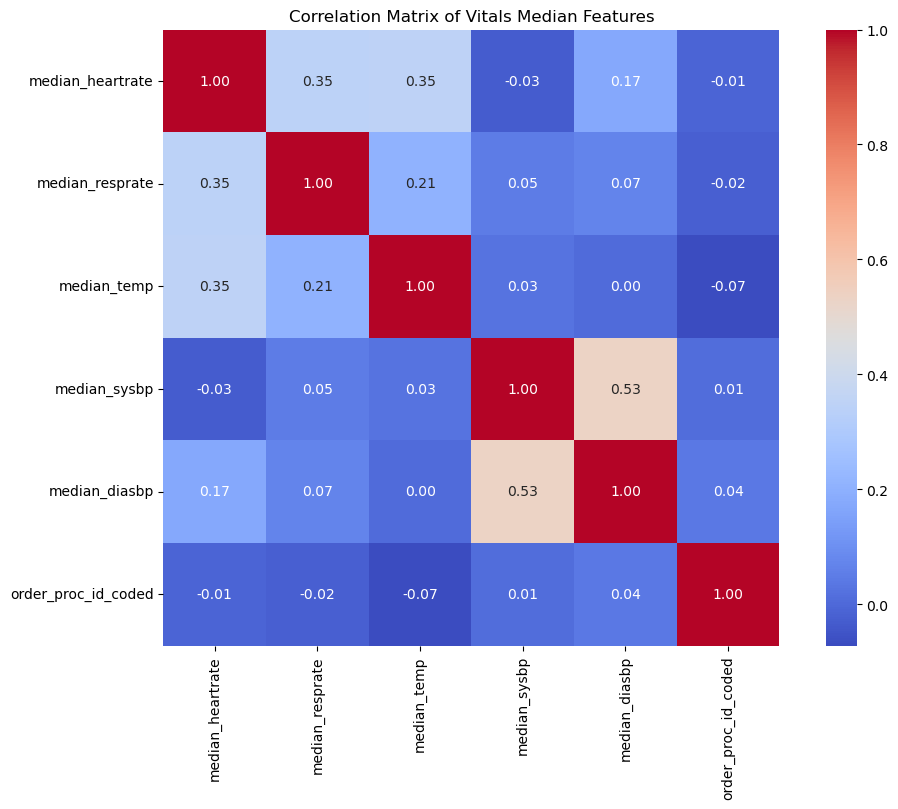

In [79]:
# visualize correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = vitals_median_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vitals Median Features')
plt.show()

## 🧪 Labs Data Exploration

This section covers the `labs` file, which contains laboratory results like white blood cell count, creatinine, procalcitonin, lactate, hemoglobin, and others. These biomarkers are crucial indicators of infection severity and systemic response.

### file : microbiology_cultures_labs.csv

Based on the ARMD dataset description and supporting clinical paper, we will focus on the `median_` columns in this file as they provide a more stable and representative summary of the patient's condition prior to culture ordering.

In [98]:
# file path for vitals data and reading the CSV file
labs_file = data_path + "microbiology_cultures_labs.csv"
labs_data = pd.read_csv(labs_file)
labs_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\2713228149.py:3: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  labs_data = pd.read_csv(labs_file)


,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,Period_Day,Q75_wbc,Q25_wbc,median_wbc,Q25_neutrophils,Q75_neutrophils,median_neutrophils,...,last_plt,first_plt,last_hgb,first_hgb,last_lymphocytes,first_lymphocytes,last_neutrophils,first_neutrophils,last_wbc,first_wbc
0,JC3080045,131362484007,906727631,14,Null,Null,Null,49.0,49.0,49.0,...,Null,49.0,Null,49.0,Null,49.0,Null,49.0,Null,Null
1,JC2891328,131283209225,654338304,14,Null,Null,Null,29.0,29.0,29.0,...,29.0,Null,29.0,Null,29.0,Null,29.0,Null,Null,Null
2,JC2761705,131279968565,645785381,14,Null,Null,Null,4.0,4.0,4.0,...,Null,4.0,Null,4.0,Null,4.0,Null,4.0,Null,Null
3,JC1464815,131018095632,398734817,14,Null,Null,Null,58.0,58.0,58.0,...,58.0,Null,58.0,Null,58.0,Null,58.0,Null,Null,Null
4,JC2004854,131358162167,902622534,14,Null,Null,Null,39.0,39.0,39.0,...,39.0,Null,39.0,Null,39.0,Null,39.0,Null,Null,Null


In [99]:
labs_data.shape

(1408677, 59)

In [100]:
labs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408677 entries, 0 to 1408676
Data columns (total 59 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   anon_id               1408677 non-null  object
 1   pat_enc_csn_id_coded  1408677 non-null  int64 
 2   order_proc_id_coded   1408677 non-null  int64 
 3   Period_Day            1408677 non-null  int64 
 4   Q75_wbc               1408677 non-null  object
 5   Q25_wbc               1408677 non-null  object
 6   median_wbc            1408677 non-null  object
 7   Q25_neutrophils       1408677 non-null  object
 8   Q75_neutrophils       1408677 non-null  object
 9   median_neutrophils    1408677 non-null  object
 10  Q25_lymphocytes       1408677 non-null  object
 11  Q75_lymphocytes       1408677 non-null  object
 12  median_lymphocytes    1408677 non-null  object
 13  Q25_hgb               1408677 non-null  object
 14  Q75_hgb               1408677 non-null  object
 15

In [101]:
# features that start with 'median_' are the ones we will focus on
labs_median_columns = [col for col in labs_data.columns if col.startswith('median_')]
# add order_proc_id_coded to the list of median columns
labs_median_columns.append('order_proc_id_coded')
# filter the DataFrame to only include median columns
labs_median_data = labs_data[labs_median_columns]
print(labs_median_columns)
print(labs_median_data.shape)

['median_wbc', 'median_neutrophils', 'median_lymphocytes', 'median_hgb', 'median_plt', 'median_na', 'median_hco3', 'median_bun', 'median_cr', 'median_lactate', 'median_procalcitonin', 'order_proc_id_coded']
(1408677, 12)


In [102]:
# replace 'Null' with NaN for better handling of missing values
labs_median_data = labs_median_data.replace('Null', np.nan)

# check for missing values in the median columns
labs_median_data.isnull().sum()

median_wbc                26267
median_neutrophils      1045088
median_lymphocytes      1054708
median_hgb                25039
median_plt                26377
median_na                 88295
median_hco3               85466
median_bun                86894
median_cr                 73242
median_lactate           832265
median_procalcitonin    1216557
order_proc_id_coded           0
dtype: int64

In [103]:
labs_median_data.tail()

,median_wbc,median_neutrophils,median_lymphocytes,median_hgb,median_plt,median_na,median_hco3,median_bun,median_cr,median_lactate,median_procalcitonin,order_proc_id_coded
1408672,12.1,13.9,10.4,9100.0,114.0,138.0,25.0,13.0,0.78,NaN,NaN,700537993
1408673,9.1,NaN,NaN,9500.0,119.0,135.0,23.0,10.0,0.78,NaN,NaN,925526092
1408674,17.5,6.0,20.0,9800.0,281.0,131.0,34.0,20.0,1.06,NaN,NaN,583903891
1408675,6.8,NaN,NaN,8700.0,182.0,138.0,26.0,19.0,1.06,NaN,NaN,518159387
1408676,14.7,94.0,0.0,17400.0,271.0,142.0,30.0,14.0,0.8,0.97,NaN,857883578


In [104]:
labs_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408677 entries, 0 to 1408676
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   median_wbc            1382410 non-null  object
 1   median_neutrophils    363589 non-null   object
 2   median_lymphocytes    353969 non-null   object
 3   median_hgb            1383638 non-null  object
 4   median_plt            1382300 non-null  object
 5   median_na             1320382 non-null  object
 6   median_hco3           1323211 non-null  object
 7   median_bun            1321783 non-null  object
 8   median_cr             1335435 non-null  object
 9   median_lactate        576412 non-null   object
 10  median_procalcitonin  192120 non-null   object
 11  order_proc_id_coded   1408677 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 129.0+ MB


In [105]:
# transform the data to numeric for analysis
labs_median_data = labs_median_data.apply(pd.to_numeric, errors='coerce')

# check the data types after conversion
labs_median_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408677 entries, 0 to 1408676
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   median_wbc            1382410 non-null  float64
 1   median_neutrophils    363589 non-null   float64
 2   median_lymphocytes    353969 non-null   float64
 3   median_hgb            1383638 non-null  float64
 4   median_plt            1382300 non-null  float64
 5   median_na             1320382 non-null  float64
 6   median_hco3           1323211 non-null  float64
 7   median_bun            1321783 non-null  float64
 8   median_cr             1335435 non-null  float64
 9   median_lactate        576412 non-null   float64
 10  median_procalcitonin  192120 non-null   float64
 11  order_proc_id_coded   1408677 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 129.0 MB


In [106]:
# check duplicates in the order_proc_id_coded column
duplicates = labs_median_data['order_proc_id_coded'].duplicated().sum()
print(f"Number of duplicate order_proc_id_coded entries: {duplicates}")

Number of duplicate order_proc_id_coded entries: 916018


In [107]:
# check rows of order_proc_id_coded = 790861816
labs_order_cols = labs_median_data[labs_median_data['order_proc_id_coded'] == 857883578]
labs_order_cols.shape

(3, 12)

In [108]:
labs_order_cols.head()

,median_wbc,median_neutrophils,median_lymphocytes,median_hgb,median_plt,median_na,median_hco3,median_bun,median_cr,median_lactate,median_procalcitonin,order_proc_id_coded
781422,14.7,94.0,0.0,17400.0,271.0,142.0,30.0,14.0,0.8,0.97,NaN,857883578
781423,14.7,94.0,0.0,17400.0,271.0,142.0,30.0,14.0,0.8,0.97,NaN,857883578
1408676,14.7,94.0,0.0,17400.0,271.0,142.0,30.0,14.0,0.8,0.97,NaN,857883578


In [109]:
# after we found that values for each order_proc_id_coded rows are repeated, we can drop the duplicates
labs_median_data = labs_median_data.drop_duplicates(subset='order_proc_id_coded')
labs_median_data.shape

(492659, 12)

In [115]:
# check for missing values
labs_median_data.isnull().sum()


median_wbc               14987
median_neutrophils      404015
median_lymphocytes      409345
median_hgb               14199
median_plt               14742
median_na                45405
median_hco3              44245
median_bun               44289
median_cr                38280
median_lactate          306554
median_procalcitonin    449939
order_proc_id_coded          0
dtype: int64

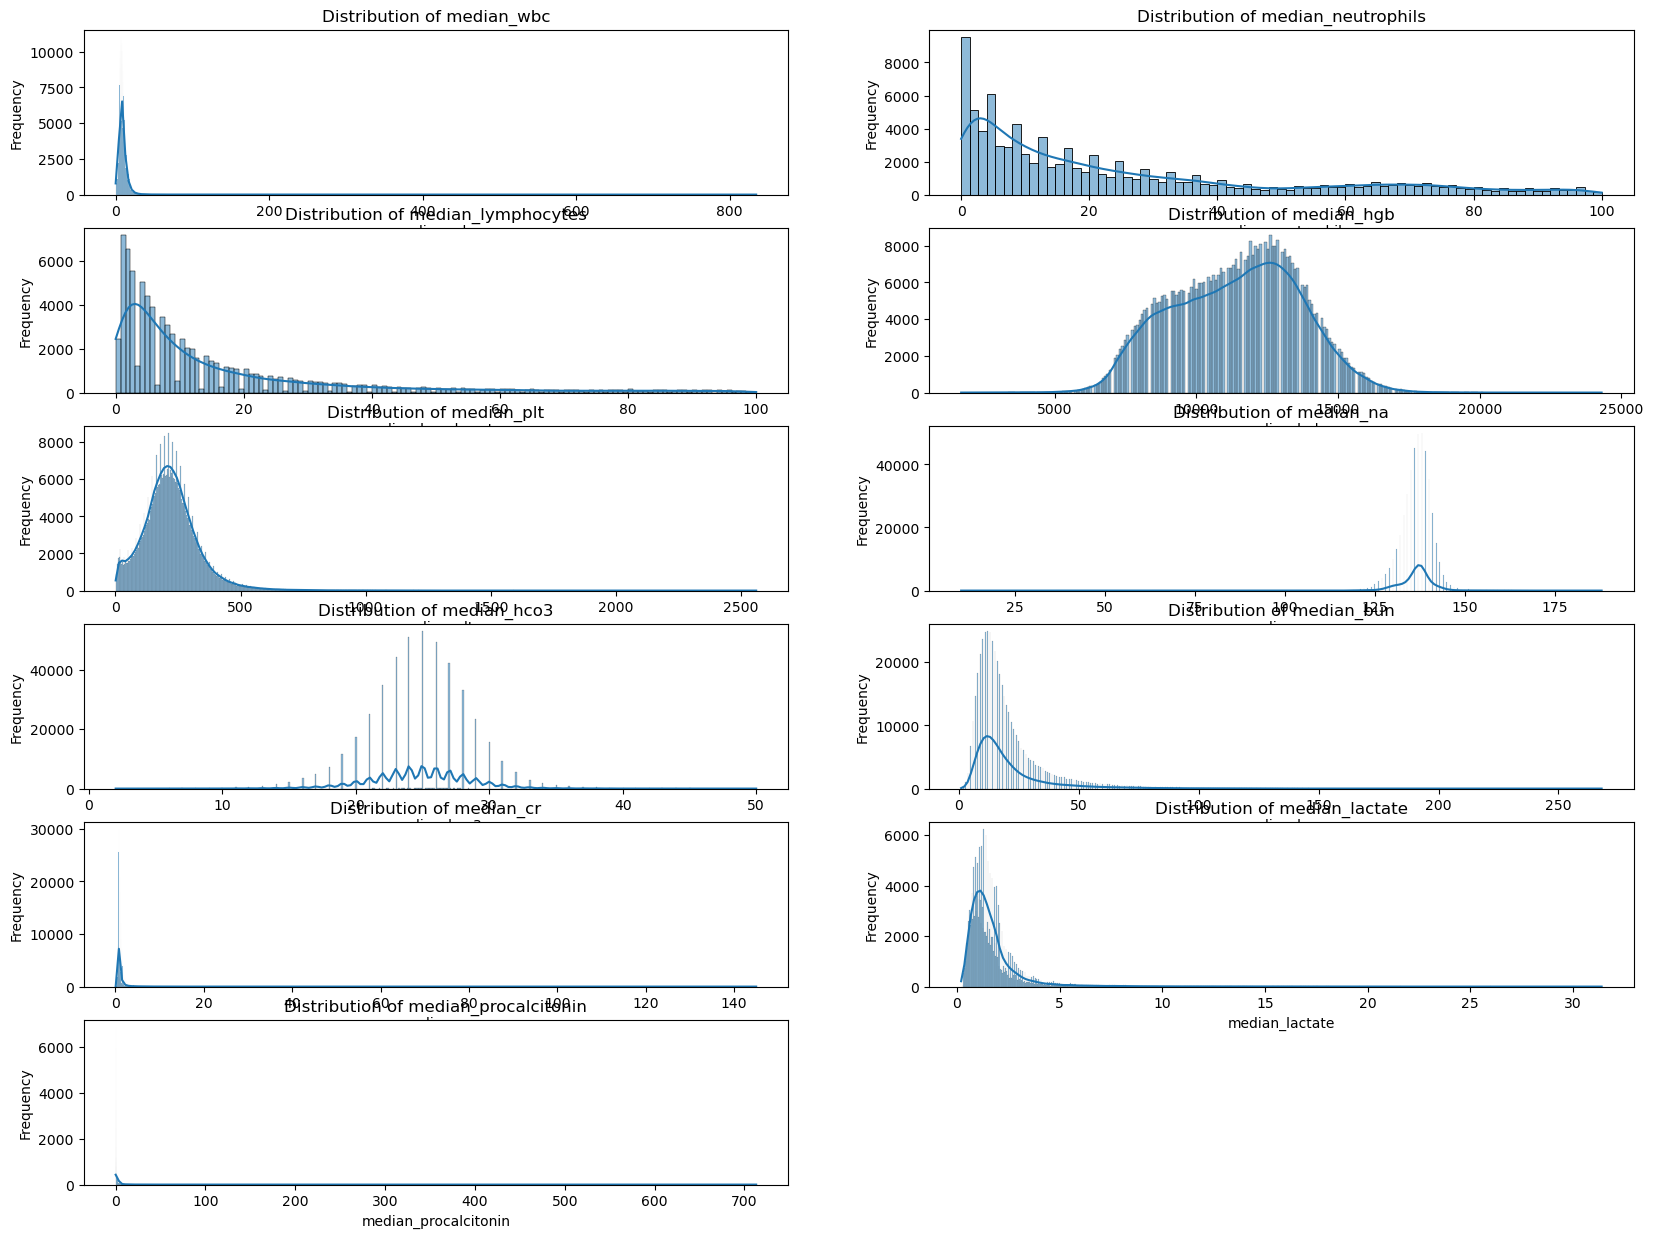

In [116]:
# plot distributions of the median features
plt.figure(figsize=(20, 15))
for i, column in enumerate(labs_median_columns[:-1], 1):
    plt.subplot(6, 2, i)
    sns.histplot(labs_median_data[column].dropna(), kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

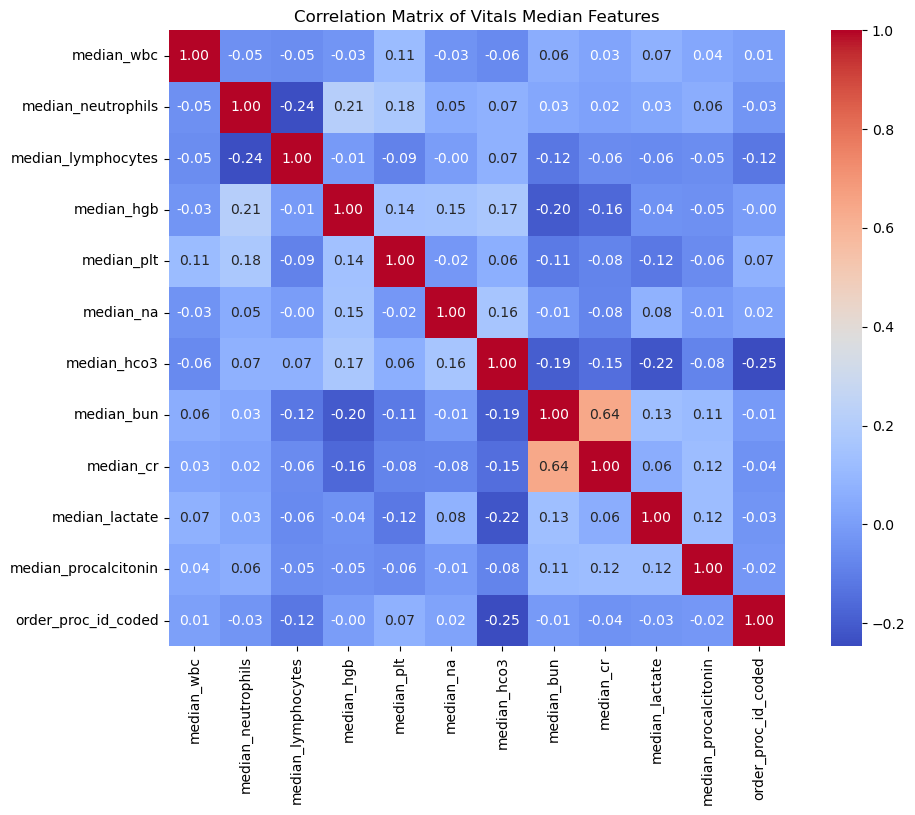

In [117]:
# visualize correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = labs_median_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Vitals Median Features')
plt.show()

## CHECKPOINT OF Merge labs and vitals TOGETHER

In [135]:
print(f"vitals_median_data.shape: {vitals_median_data.shape}")
print(f"labs_median_data.shape: {labs_median_data.shape}")

vitals_median_data.shape: (581340, 6)
labs_median_data.shape: (492659, 12)


In [134]:
# merge vitals and labs data on order_proc_id_coded
vitals_labs = pd.merge(vitals_median_data, labs_median_data, on='order_proc_id_coded', how='inner')
# check the merged data
vitals_labs.shape

(431744, 17)

In [136]:
vitals_labs.isnull().sum()

median_heartrate          6530
median_resprate          30511
median_temp              20810
median_sysbp              3336
median_diasbp             3495
order_proc_id_coded          0
median_wbc                9785
median_neutrophils      350630
median_lymphocytes      352553
median_hgb                9069
median_plt                9460
median_na                20217
median_hco3              21729
median_bun               23261
median_cr                19465
median_lactate          247468
median_procalcitonin    389581
dtype: int64

## 👤 Demographics Data Exploration

Here we examine the `demographics` file, which includes patient-level attributes such as age, gender, and socioeconomic status (if available). These features help characterize patient risk profiles.

### file : microbiology_cultures_demographics.csv

In [118]:
file_path = data_path + "microbiology_cultures_demographics.csv"
demographics_data = pd.read_csv(file_path)
demographics_data.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_15012\536448240.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  demographics_data = pd.read_csv(file_path)


,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,age,gender
0,JC1212710,131008781669,364609652,25-34 years,Null
1,JC1218441,33052060,351667304,25-34 years,Null
2,JC1261412,131004002288,355531114,25-34 years,Null
3,JC1224853,19532426,335118697,25-34 years,Null
4,JC1242725,32587123,349578403,25-34 years,Null


In [119]:
# keep only order_proc_id_coded, age and gender
demographics_data = demographics_data[['order_proc_id_coded', 'age', 'gender']]
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751075 entries, 0 to 751074
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   order_proc_id_coded  751075 non-null  int64 
 1   age                  751075 non-null  object
 2   gender               751075 non-null  object
dtypes: int64(1), object(2)
memory usage: 17.2+ MB


In [121]:
# replace 'Null' with NaN for better handling of missing values
demographics_data = demographics_data.replace('Null', np.nan)
# check for missing values
demographics_data.isnull().sum()

order_proc_id_coded      0
age                      0
gender                 120
dtype: int64

In [122]:
demographics_data['gender'].unique()

array([nan, '1', 1, 0, '0'], dtype=object)

In [123]:
demographics_data['gender'] = demographics_data['gender'].apply(pd.to_numeric, errors='coerce')
# check the unique values
demographics_data['gender'].unique()

array([nan,  1.,  0.])

In [125]:
demographics_data['gender'].value_counts()

gender
0.0    478814
1.0    272141
Name: count, dtype: int64

In [126]:
demographics_data['order_proc_id_coded'].nunique()

751075

In [127]:
demographics_data['age'].value_counts()

age
65-74 years    130764
55-64 years    122486
75-84 years    100915
25-34 years     99023
35-44 years     93245
45-54 years     93033
18-24 years     47509
85-89 years     34458
above 90        29642
Name: count, dtype: int64

In [128]:
demographics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751075 entries, 0 to 751074
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_proc_id_coded  751075 non-null  int64  
 1   age                  751075 non-null  object 
 2   gender               750955 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.2+ MB


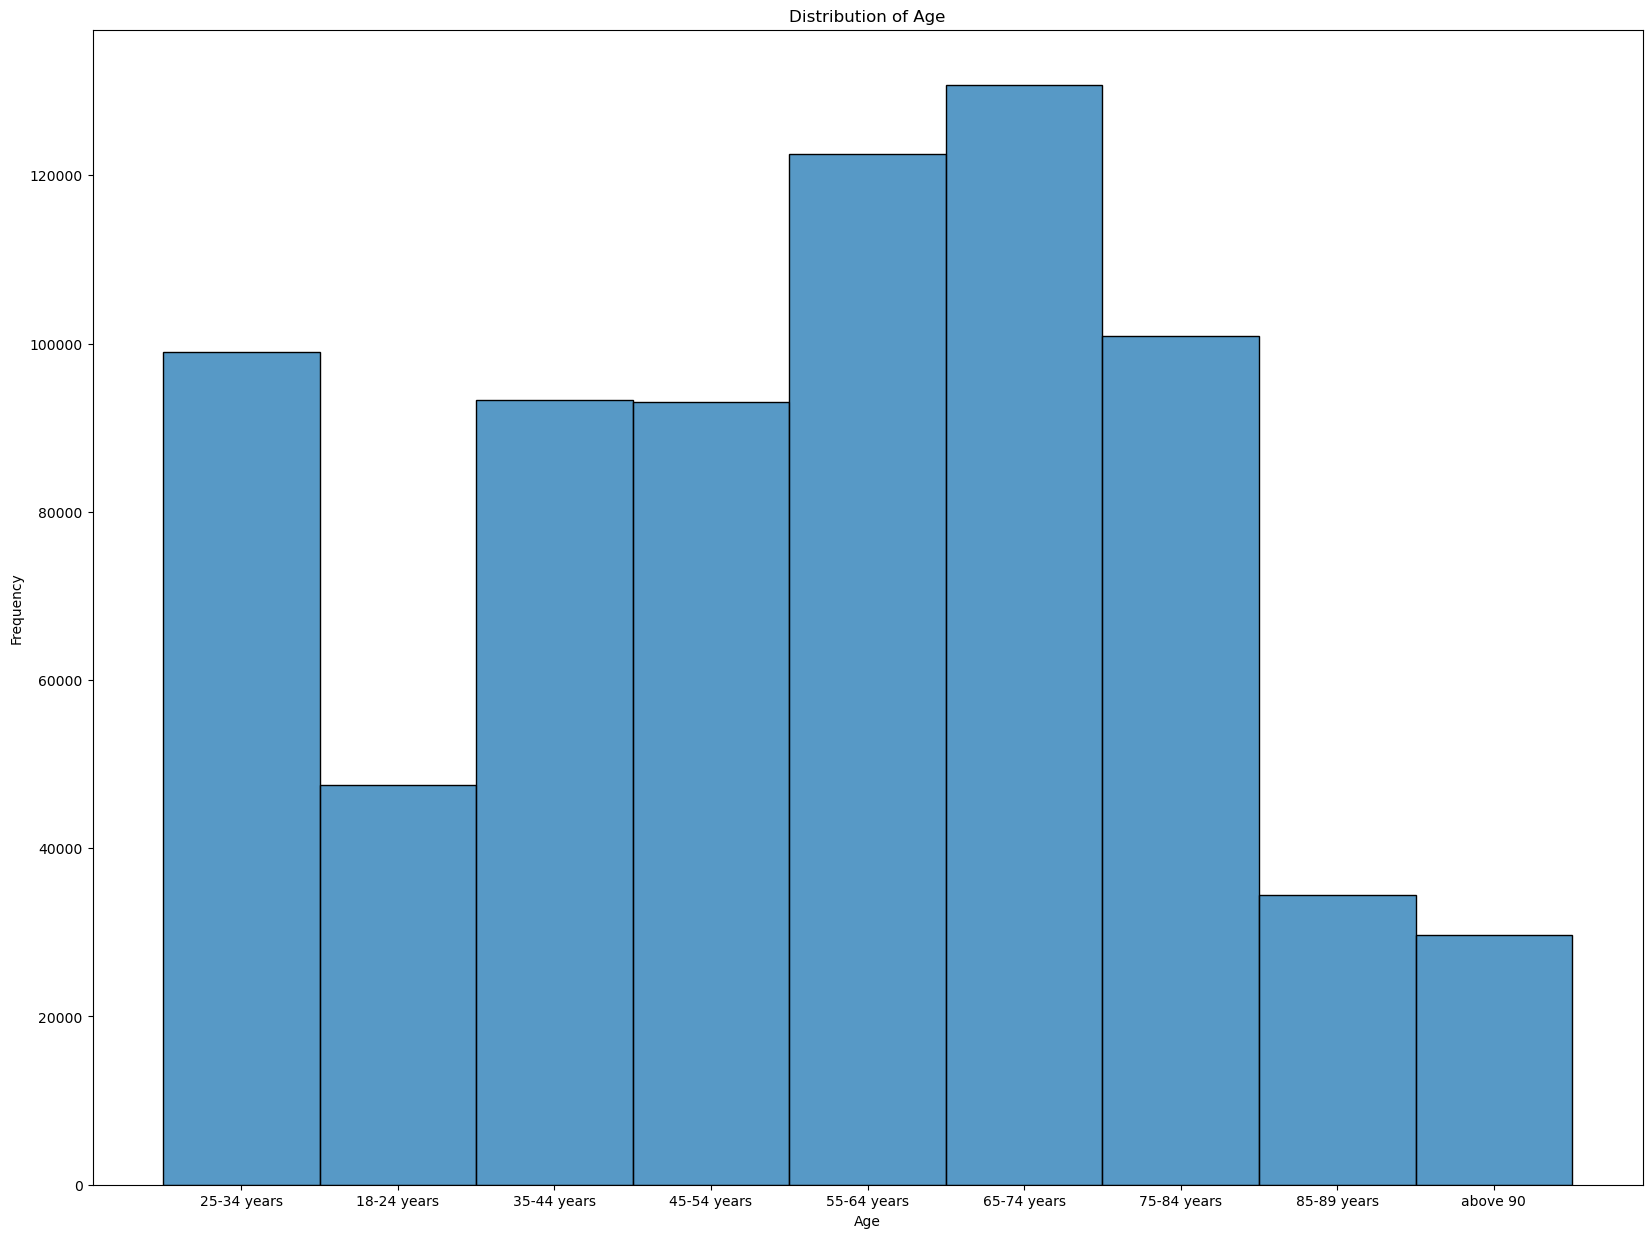

In [130]:
# plot the distribution of age
plt.figure(figsize=(20, 15))
sns.histplot(demographics_data['age'].dropna())
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## CHECK POINT OF FEATURES TRY TO MERGE demographics with vitals_labs

In [137]:
# merge the demographics data with vitals and labs data on order_proc_id_coded
full_features = pd.merge(demographics_data, vitals_labs, on='order_proc_id_coded', how='inner')
# check the merged data
full_features.shape

(431744, 19)

In [138]:
full_features.isnull().sum()

order_proc_id_coded          0
age                          0
gender                      30
median_heartrate          6530
median_resprate          30511
median_temp              20810
median_sysbp              3336
median_diasbp             3495
median_wbc                9785
median_neutrophils      350630
median_lymphocytes      352553
median_hgb                9069
median_plt                9460
median_na                20217
median_hco3              21729
median_bun               23261
median_cr                19465
median_lactate          247468
median_procalcitonin    389581
dtype: int64

## 🧫 Cohort & Culture Data Exploration

This section analyzes the `cohort` file, which includes culture orders, organisms identified, and antibiotic susceptibility results. It is the primary source for constructing the prediction label and understanding antibiotic effectiveness.

### file : microbiology_cultures_cohort.csv


In [139]:
cohort_path = data_path + "microbiology_cultures_cohort.csv"
cohort_data = pd.read_csv(cohort_path)
cohort_data.head()

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,order_time_jittered_utc,ordering_mode,culture_description,was_positive,organism,antibiotic,susceptibility
0,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible
1,JC1713666,131300064625,697566032,2020-12-27 00:40:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible
2,JC1669304,131272997044,620809641,2019-07-02 19:54:00+00:00,Inpatient,BLOOD,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible
3,JC1697441,131208305006,510635146,2016-12-01 13:59:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible
4,JC600786,131344486993,834128837,2022-11-18 19:35:00+00:00,Outpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible


In [167]:
# check for rows of this order_proc_id_coded== 928257722
cohort_data[cohort_data['order_proc_id_coded'] == 928257722]

,anon_id,pat_enc_csn_id_coded,order_proc_id_coded,order_time_jittered_utc,ordering_mode,culture_description,was_positive,organism,antibiotic,susceptibility
0,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ertapenem,Susceptible
1999,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Meropenem,Susceptible
12086,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ampicillin/Sulbactam,Susceptible
22820,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ceftazidime,Susceptible
84541,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Aztreonam,Susceptible
321333,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Ciprofloxacin,Susceptible
515715,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Nitrofurantoin,Susceptible
571222,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Piperacillin/Tazobactam,Susceptible
975372,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Cefazolin,Susceptible
1119666,JC2744063,131368600230,928257722,2023-12-23 22:29:00+00:00,Inpatient,URINE,1,KLEBSIELLA PNEUMONIAE,Cefepime,Susceptible


In [166]:
cohort_data['culture_description'].unique()

array(['URINE', 'BLOOD', 'RESPIRATORY'], dtype=object)

In [161]:
# replace 'Null' with NaN for better handling of missing values
cohort_data = cohort_data.replace('Null', np.nan)
# check for missing values
cohort_data.isnull().sum()

anon_id                         0
pat_enc_csn_id_coded            0
order_proc_id_coded             0
order_time_jittered_utc         0
ordering_mode               73042
culture_description             0
was_positive                    0
organism                   632308
antibiotic                 632308
susceptibility             634468
dtype: int64

In [142]:
print(cohort_data.shape)
cohort_data.info()

(2241050, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241050 entries, 0 to 2241049
Data columns (total 10 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   anon_id                  object
 1   pat_enc_csn_id_coded     int64 
 2   order_proc_id_coded      int64 
 3   order_time_jittered_utc  object
 4   ordering_mode            object
 5   culture_description      object
 6   was_positive             int64 
 7   organism                 object
 8   antibiotic               object
 9   susceptibility           object
dtypes: int64(3), object(7)
memory usage: 171.0+ MB


In [148]:
"""
The was_positive column in the cohort file indicates whether the microbiology 
culture test was positive, meaning it successfully identified an organism.
"""
print(cohort_data['was_positive'].unique())
cohort_data['was_positive'].value_counts()

[1 0]


was_positive
1    1610252
0     630798
Name: count, dtype: int64

In [149]:
# These values from the ordering_mode column describe the hospital care setting at the time the culture order was placed.
print(cohort_data['ordering_mode'].unique())
cohort_data['ordering_mode'].value_counts()

['Inpatient' 'Outpatient' 'Null']


ordering_mode
Inpatient     1238720
Outpatient     929288
Null            73042
Name: count, dtype: int64

In [151]:
"""
The susceptibility feature indicates whether a specific antibiotic 
was effective against the identified organism in a culture result.
"""
print(cohort_data['susceptibility'].unique())
cohort_data['susceptibility'].value_counts()

['Susceptible' 'Resistant' 'Intermediate' 'Inconclusive' 'Null'
 'Synergism']


susceptibility
Susceptible     1289258
Null             634468
Resistant        265071
Intermediate      47651
Inconclusive       2670
Synergism          1932
Name: count, dtype: int64

In [158]:
# antibiotic number of unique values
print(cohort_data['antibiotic'].nunique())

55


In [153]:
cohort_data.shape

(2241050, 10)

In [152]:
# filter rows where was_positive 1
positive_cultures = cohort_data[cohort_data['was_positive'] == 1]
positive_cultures.shape

(1610252, 10)

In [156]:
# filter rows where ordering_mode is == 'inpatient'
inpatient_cultures = positive_cultures[positive_cultures['ordering_mode'] == 'Inpatient']   
inpatient_cultures.shape

(839256, 10)

In [163]:
# filter rows where suciptibility == Susceptible
inpatient_susceptible_cultures = inpatient_cultures[inpatient_cultures['susceptibility'] == 'Susceptible']
inpatient_susceptible_cultures.shape

(660207, 10)

In [164]:
# check for missing values
inpatient_susceptible_cultures.isnull().sum()

anon_id                    0
pat_enc_csn_id_coded       0
order_proc_id_coded        0
order_time_jittered_utc    0
ordering_mode              0
culture_description        0
was_positive               0
organism                   0
antibiotic                 0
susceptibility             0
dtype: int64

In [165]:
# nunique of order_proc_id_coded
inpatient_susceptible_cultures['order_proc_id_coded'].nunique()

63876

In [159]:
inpatient_susceptible_cultures['antibiotic'].nunique()

54

In [168]:
# features we need from cohort : [order_proc_id_coded, organism, antibiotic]
cohort_features = inpatient_susceptible_cultures[['order_proc_id_coded', 'culture_description', 'antibiotic']]
cohort_features.shape

(660207, 3)

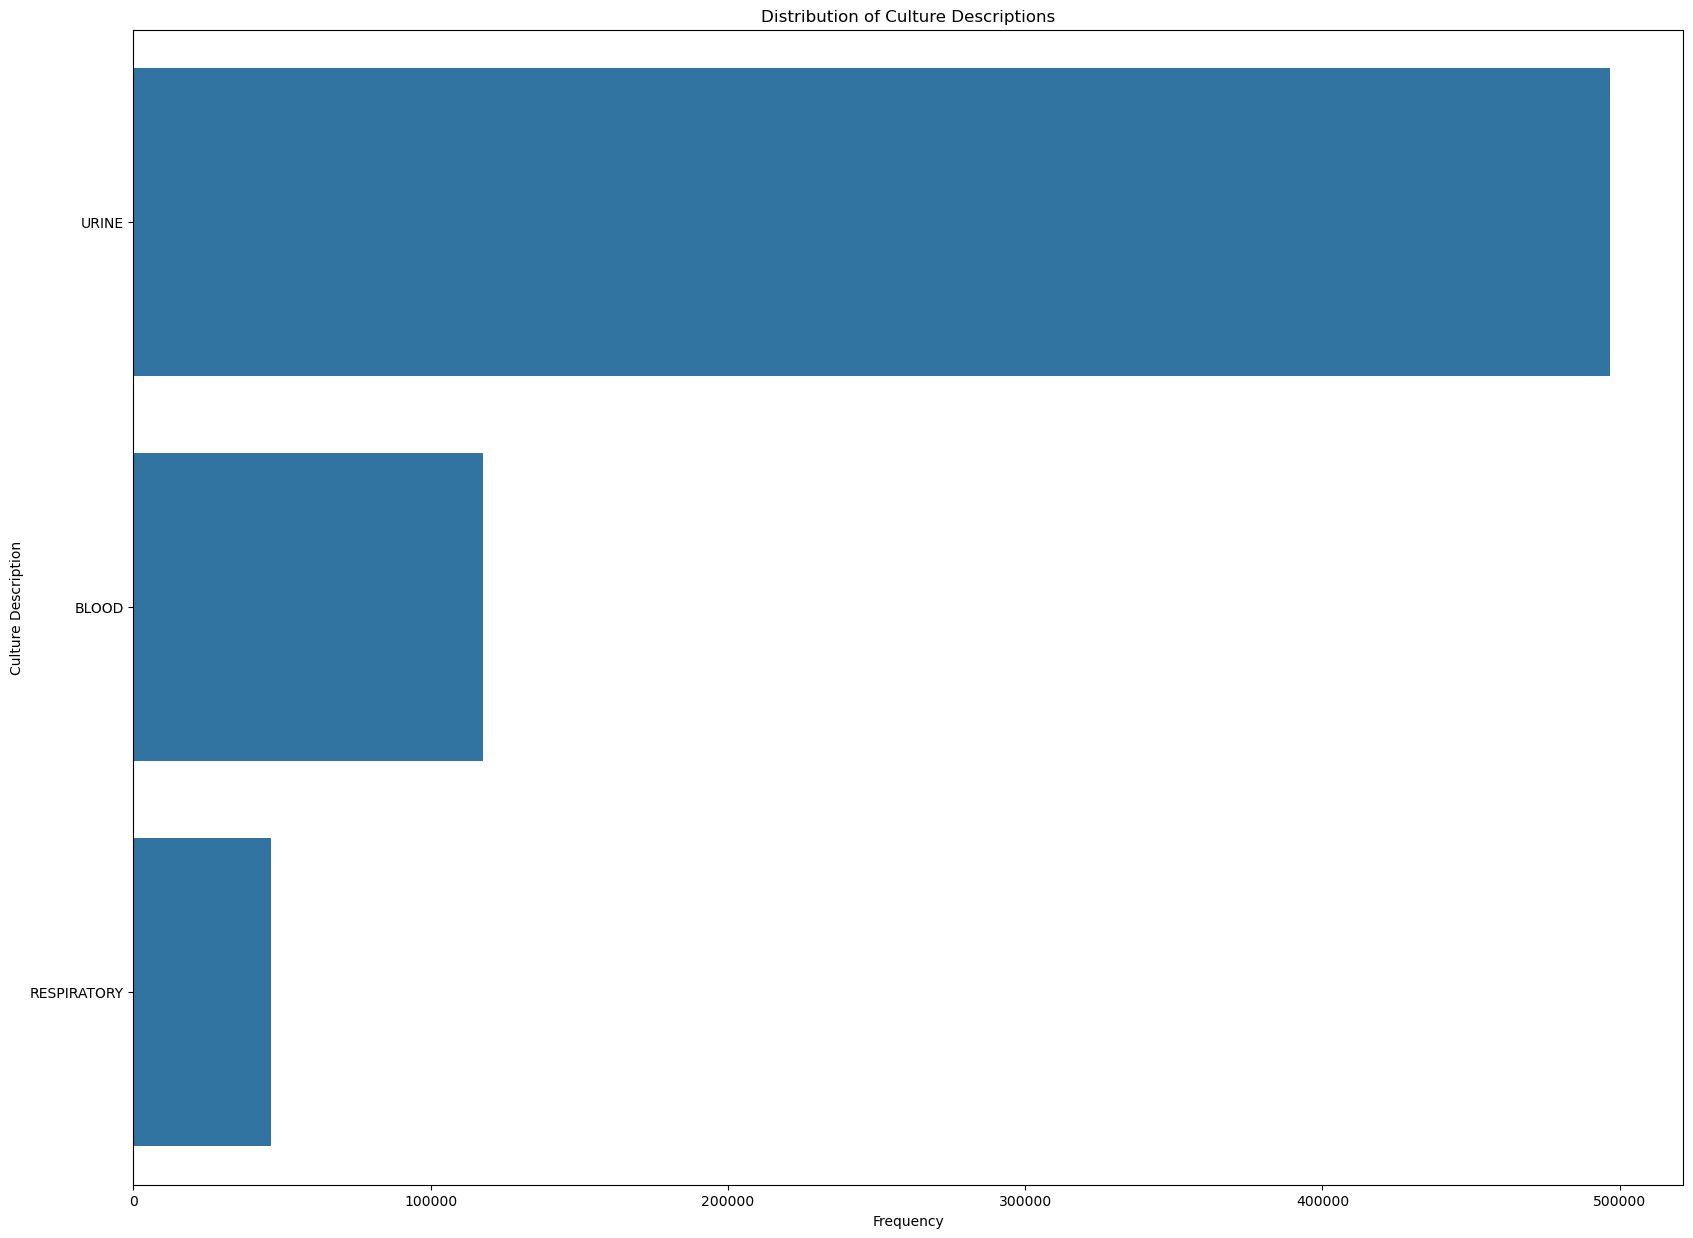

In [169]:
# plot culture_description
plt.figure(figsize=(20, 15))
sns.countplot(data=cohort_features, y='culture_description', order=cohort_features['culture_description'].value_counts().index)
plt.title('Distribution of Culture Descriptions')
plt.xlabel('Frequency')
plt.ylabel('Culture Description')
plt.show()

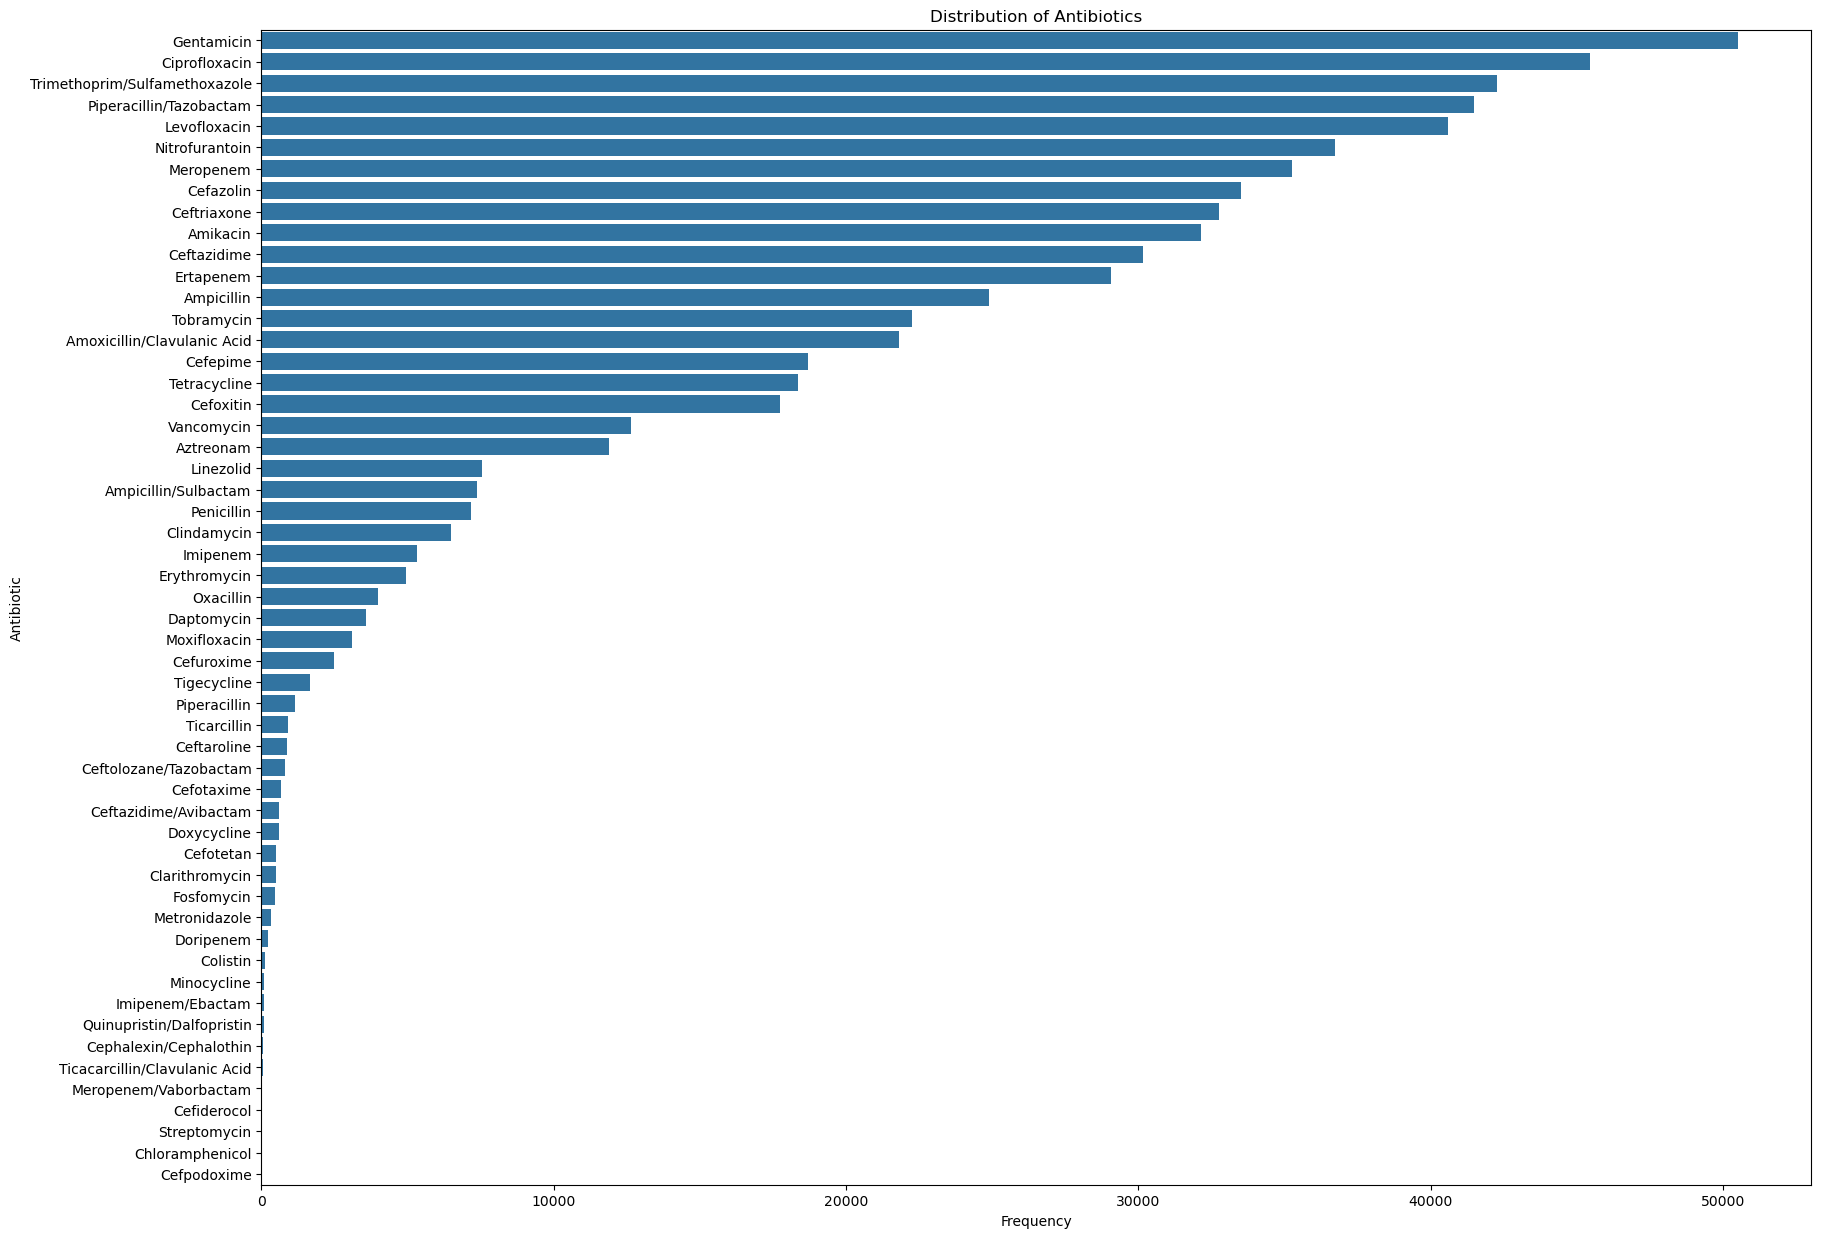

In [170]:
# plot antibiotic distribution
plt.figure(figsize=(20, 15))
sns.countplot(data=cohort_features, y='antibiotic', order=cohort_features['antibiotic'].value_counts().index)
plt.title('Distribution of Antibiotics')
plt.xlabel('Frequency')
plt.ylabel('Antibiotic')
plt.show()

# Checkpoint merge cohort with full_features

In [171]:
complete_data = pd.merge(cohort_features, full_features, on='order_proc_id_coded', how='inner')
# check the merged data
complete_data.shape

(474243, 21)

In [172]:
complete_data.isnull().sum()

order_proc_id_coded          0
culture_description          0
antibiotic                   0
age                          0
gender                      25
median_heartrate           732
median_resprate           8837
median_temp               7487
median_sysbp              2899
median_diasbp             3095
median_wbc                8618
median_neutrophils      404770
median_lymphocytes      403953
median_hgb                7662
median_plt                8145
median_na                 8479
median_hco3               9373
median_bun                9919
median_cr                 7300
median_lactate          303349
median_procalcitonin    443813
dtype: int64

In [173]:
# write the complete data to a CSV file
complete_data.to_csv(data_path + "complete_microbiology_cultures_data.csv", index=False)
print("Complete data saved to CSV file.")

Complete data saved to CSV file.
